In [ ]:
# %tensorflow_version 2.x
#import tensorflow as tf
#device_name = tf.test.gpu_device_name()
#if device_name != '/device:GPU:0':
#  raise SystemError('GPU device not found')
#print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import time
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pathlib
from sklearn.datasets import fetch_20newsgroups
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense



%matplotlib inline

In [4]:
import os
IS_COLAB_BACKEND = 'COLAB_GPU' in os.environ  # this is always set on Colab, the value is 0 or 1 depending on GPU presence
if IS_COLAB_BACKEND:
  from google.colab import auth
  # Authenticates the Colab machine and also the TPU using your
  # credentials so that they can access your private GCS buckets.
  auth.authenticate_user()

In [5]:
!pip install -U pip install -U tensorboard_plugin_profile==2.3.0

     |████████████████████████████████| 1.6 MB 5.3 MB/s 
     |████████████████████████████████| 1.1 MB 56.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [6]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.6.0
Running on TPU  ['10.107.52.42:8470']
INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.107.52.42:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.107.52.42:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


As the research is performed using Google Colab, mounting the drive to upload the datafram of JDs.

In [8]:
# Mounting the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Loading the file consisting of JDs in a dataframe 
jd = pd.read_csv("/content/drive/MyDrive/AI ML/Research Documents/DataSet/reed_uk.csv")

Understanding the Data and performing preliminary Data Analysis

In [10]:
jd.head()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
0,catering jobs,Chudleigh,Haulfryn Group,uk,reed,Apply now New opportunity not to be missed! H...,NaN,Commis Chef,"Permanent, full-time",3/12/2018,"£18,323 per annum",Devon
1,law jobs,Swindon,Reed,uk,reed,Apply now This role requires an experienced s...,NaN,Corporate Legal Secretary,"Permanent, full-time",3/8/2018,"£18,000 - £22,000 per annum",Wiltshire
2,factory jobs,Norfolk,Swanstaff Recruitment Ltd,uk,reed,Apply now Job Title: Warehouse personLocation...,NaN,Warehouse Person,"Permanent, full-time",2/27/2018,Salary not specified,East Anglia
3,law jobs,Hurstpierpoint,Castles Solicitors,uk,reed,Apply now Castles Solicitors are looking for ...,Required skills Admin Case Management Corresp...,Legal Secretary / Admin Assistant,"Permanent, full-time or part-time",2/21/2018,"£15,000 - £17,000 per annum, pro-rata",West Sussex
4,factory jobs,Hertfordshire,Marketplace Group,uk,reed,Apply now International Pharmaceutical Manufa...,NaN,Category Planner - Pharmaceutical,"Permanent, full-time",3/1/2018,"£37,000 - £45,000 per annum",South East England


In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Finding out the features of the data frame
jd.describe()

,category,city,company_name,geo,job_board,job_description,job_requirements,job_title,job_type,post_date,salary_offered,state
count,50000,50000,50000,50000,50000,50000,20548,50000,50000,50000,50000,49980
unique,37,2918,5166,1,1,42057,14887,29155,9,66,7345,167
top,health jobs,London,Hays Specialist Recruitment Limited,uk,reed,Apply on employer's website Add an annual tur...,Required skills Recruitment,Administrator,"Permanent, full-time",3/7/2018,Salary negotiable,London
freq,1930,4349,1830,50000,50000,85,123,162,36864,8472,4539,5900


In [13]:
jd.shape

(50000, 12)

**On** the basis of the preliminary data analysis, there are total 50000 Job Descriptions and 12 Features.  The Dataframe is of dimension (50000 x 12)

## Data Description
Table 4.2.1 and Table 4.2.2 below are the data description tables pulled from the UK job Board called “Reed”. It is evident from the Table 4.2.1 that there are 50000 jobs. Total number of categories are 37. The highest number of jobs are present in the field of Healthcare. As this is the UK based job data bank, all the jobs are from the country of UK. The highest number of Jobs are available with Hays Specials Recruitment Limited. As this is presumably the recruitment firm, it might have posted maximum number of jobs on the job board. The highest number of jobs are available for the job title of “Administrator”. It is also found that maximum number of jobs are fulltime. With reference to Table 4.2.2, its evident that the total number of job titles are 29155. As this dated data, the maximum number of jobs were posted on 3/7/2018. 


In [14]:
|print(f"Number of documents = {len(jd)}")

SyntaxError: ignored

In [15]:
# Importing library as required

from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import re
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import euclidean_distances

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
tfidfvectoriser=TfidfVectorizer()
tfidfvectoriser.fit(jd)
tfidf_vectors = tfidfvectoriser.transform(jd)

In [17]:
pairwise_similarities=np.dot(tfidf_vectors,tfidf_vectors.T).toarray()
pairwise_differences=euclidean_distances(tfidf_vectors)


In [18]:
def most_similar(doc_id,similarity_matrix,matrix):
    print (f'Document: {jd.iloc[doc_id]["job_description"]}')
    print ('\n')
    print ('Similar Documents:')
    if matrix=='Cosine Similarity':
        similar_ix=np.argsort(similarity_matrix[doc_id])[::-1]
    for ix in similar_ix:
        if ix==doc_id:
            continue
        print('\n')
        print (f'Document: {jd.iloc[ix]["job_description"]}')
        print (f'{matrix} : {similarity_matrix[doc_id][ix]}')

most_similar(0,pairwise_similarities,'Cosine Similarity')


Document:  Apply now New opportunity not to be missed! Haulfryn Group has a fantastic opportunity for a Commis Chef to join a growing team at our friendly holiday resort, Finlake Holiday Resort. In return, we offer our Commis Chef a competitive salary depending on experience plus excellent benefits. Working at our prestigious and exclusive Holiday Park with owners who expect nothing but the best, we need an exceptional person to join our kitchen team. Weâ€™re looking for an organised, enthusiastic and standards oriented food professional. Our ideal Commis Chef will have the following skills and experience: - NVQ level 2 in Food Preparation or equivalent - Experience in a similar position - Eye for quality standards - Enthusiasm for producing consistent, quality food - Ability organise unsupervised as part of a small team on shift - Food Hygiene Certificate We offer ourCommis Chef a fantastic salary and benefits* package! - Competitive salary depending on experience. - Benefits are none

In [19]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [20]:
# Tokenization of each document. In our case we mean each Job description in each row of the job_description column:
jd['tokenized'] = jd.apply(lambda row: nltk.word_tokenize(row['job_description']), axis=1)


In [21]:
jd['tokenized']

0        [Apply, now, New, opportunity, not, to, be, mi...
1        [Apply, now, This, role, requires, an, experie...
2        [Apply, now, Job, Title, :, Warehouse, personL...
3        [Apply, now, Castles, Solicitors, are, looking...
4        [Apply, now, International, Pharmaceutical, Ma...
                               ...                        
49995    [Apply, now, Scientist, -, Cell, Based, Assays...
49996    [Apply, now, Our, client, is, looking, for, hi...
49997    [Apply, on, employer, 's, website, Who, youâ€™...
49998    [Apply, now, UNDERSTANDING, ,, SERVICE, ,, TRU...
49999    [Apply, now, My, client, ,, highly, successful...
Name: tokenized, Length: 50000, dtype: object

### Now we define a function which returns the cosine similarity between 2 vectors. This will help us in mapping the similar vectors , this will help in clubbing similar documents for recommendations of Jobs for a CAndidate or mapping of the candidate to the job. 


In [22]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

### For the purpose of this research's use case we will use the following latest sentence embedding techniques:

### 1. Doc2Vec
### 2. SentenceBERT
### 3. InferSent
### 4. Universal Sentence Encoder
 

### 1. Implementation of Doc2Vec

Doc2Vec embedding, which is a Word2Vec extension, is one of the most widely used approaches. It is an unsupervised technique that extends the Word2Vec model by providing another ‘paragraph vector.' It was first introduced in 2014. In addition, there are two methods for including the paragraph vector in the model. 

a. PVDM(Distributed Memory version of Paragraph Vector)


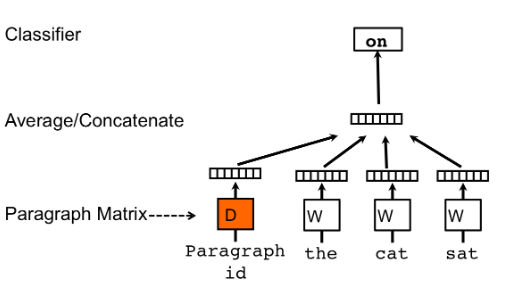

b. PVDOBW( Distributed Bag of Words version of Paragraph Vector)


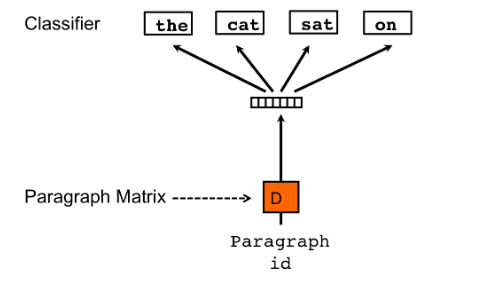

Authors of the paper recommend using both the above mentioned methods. However, they are also of the view that PVDM is more than enough in most of the cases.

*This research uses 'gensim' to implement Doc2Vec. As we already have the list of paragraphs/sentencces, lest first import the model and other libraries, post which we build a tagged sentence corpus. The aim is to represent the document as a TaggedDocument containing a list of the words and tag associated to it. *

In [23]:
# importing gensim for building Doc2Vec Model
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(jd.tokenized)]
tagged_data

[TaggedDocument(words=['Apply', 'now', 'New', 'opportunity', 'not', 'to', 'be', 'missed', '!', 'Haulfryn', 'Group', 'has', 'a', 'fantastic', 'opportunity', 'for', 'a', 'Commis', 'Chef', 'to', 'join', 'a', 'growing', 'team', 'at', 'our', 'friendly', 'holiday', 'resort', ',', 'Finlake', 'Holiday', 'Resort', '.', 'In', 'return', ',', 'we', 'offer', 'our', 'Commis', 'Chef', 'a', 'competitive', 'salary', 'depending', 'on', 'experience', 'plus', 'excellent', 'benefits', '.', 'Working', 'at', 'our', 'prestigious', 'and', 'exclusive', 'Holiday', 'Park', 'with', 'owners', 'who', 'expect', 'nothing', 'but', 'the', 'best', ',', 'we', 'need', 'an', 'exceptional', 'person', 'to', 'join', 'our', 'kitchen', 'team', '.', 'Weâ€™re', 'looking', 'for', 'an', 'organised', ',', 'enthusiastic', 'and', 'standards', 'oriented', 'food', 'professional', '.', 'Our', 'ideal', 'Commis', 'Chef', 'will', 'have', 'the', 'following', 'skills', 'and', 'experience', ':', '-', 'NVQ', 'level', '2', 'in', 'Food', 'Preparat

### Step 2: Training the Doc2Vec Model with parameters

In [24]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

{'Apply': <gensim.models.keyedvectors.Vocab at 0x7fe9c3c947d0>,
 'now': <gensim.models.keyedvectors.Vocab at 0x7fe951a35c10>,
 'New': <gensim.models.keyedvectors.Vocab at 0x7fe94ebacd10>,
 'opportunity': <gensim.models.keyedvectors.Vocab at 0x7fe94ebacb50>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7fe94ebac910>,
 'to': <gensim.models.keyedvectors.Vocab at 0x7fe94ebacc90>,
 'be': <gensim.models.keyedvectors.Vocab at 0x7fe94ebac6d0>,
 'missed': <gensim.models.keyedvectors.Vocab at 0x7fe94ebaced0>,
 '!': <gensim.models.keyedvectors.Vocab at 0x7fe94ebac9d0>,
 'Haulfryn': <gensim.models.keyedvectors.Vocab at 0x7fe94ebace50>,
 'Group': <gensim.models.keyedvectors.Vocab at 0x7fe94ebac990>,
 'has': <gensim.models.keyedvectors.Vocab at 0x7fe94ebac510>,
 'a': <gensim.models.keyedvectors.Vocab at 0x7fe94ebacf90>,
 'fantastic': <gensim.models.keyedvectors.Vocab at 0x7fe94ebaca90>,
 'for': <gensim.models.keyedvectors.Vocab at 0x7fe94ebac4d0>,
 'Commis': <gensim.models.keyedvectors.Vocab at 0x

### Step 3 : Testing the model on the Profile of the candidate. 

For this purpose, uploading the dummy data of the profiles of the candidates. The research uses dummy data of the candidates as finding the real candidate data is difficult. Furthermore, the model can be used with real candidate details as well. 

As a part of this step we print Top 5 similar job_descriptions to the candidate profiles. We will display them in a descending order. For doing this we use infer_method which returns vectorized form of the test sentences (inclusing paragraph vector). For printing the similar sentences we use 'most_similar' method. 

In [25]:
test_doc = word_tokenize("An experienced Healthcare worker with experince more than 5 years. Expert in medical assistance".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

'''
positive = List of sentences that contribute positively.
'''

'\npositive = List of sentences that contribute positively.\n'



---




### 2. Implementing SentenceBert

SentenceBert is the most advanced technique amongst all. Like Bert, SentenceBert is also based on 4 key concepts: 
- Attention
- Transformers
- BERT
- Siamese Network

Step 1: This method uses Siamese architecture to provide 2 sentences as an input. 

Step 2: Furthermore, these 2 inputs are passed to BERT models and a pooling layer to build their embeddings. 

Step 3: Using embeddings found in the above step to calculate the cosine similarity. 

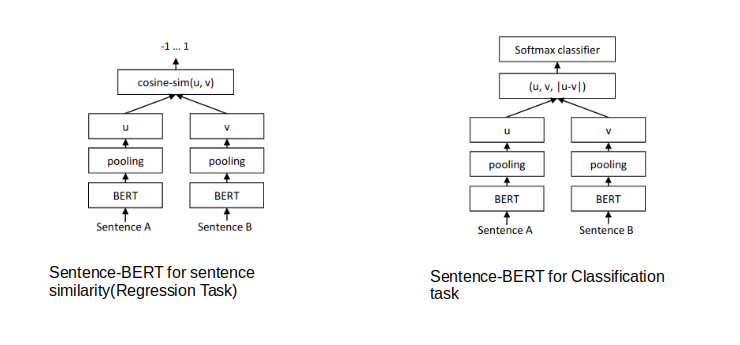

In [26]:
# installing Sentence Transformer
!pip install sentence-transformers

     |████████████████████████████████| 85 kB 2.3 MB/s 
     |████████████████████████████████| 2.6 MB 19.3 MB/s 
     |████████████████████████████████| 1.2 MB 43.4 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
     |████████████████████████████████| 636 kB 55.5 MB/s 
     |████████████████████████████████| 3.3 MB 46.7 MB/s 
     |████████████████████████████████| 895 kB 37.5 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.0.0-py3-none-any.whl size=126710 sha256=da405432eec8298c7e369d93db80aa0066c94b32012669c2f84ed90e53de5bab
  Stored in directory: /root/.cache/pip/wheels/d1/c1/0f/faafd427f705c4b012274ba60d9a91d75830306811e1355293
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


### Step 1: Loading the pre-trained Bert Model




In [27]:
from sentence_transformers import SentenceTransformer
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')
model = sbert_model

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Step 2: Encoding the provided job description. 

In [ ]:
jd_embeddings = model.encode(jd.job_description)

#print('Sample BERT embedding vector - length', len(sentence_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sentence_embeddings[0])

### Step 3: Test data (Candidate Profiles data) Embedding

In [ ]:
jd_test = "Delivery boy with cooking skills"
jd_test_vec = model.encode([jd_test])[0]

### Step 4: Computing the cosine similarities using scipy. With this the research was able to retreive the similarities between the Candidates' experiences and the apt job for the candidates. 

In [ ]:
for sent in jd.job_description:
  sim = cosine(jd_test_vec, model.encode([sent])[0])
  print("Job Description = ", sent, "; similarity = ", sim)



---



## 3. Impletmentation of InferSent

This sentence embedding technique was developed by Facebook AI Research in 2018. It is a supervised embedding technique. The main feature is that it is trained on Natural Language Interference (NLI) dataset or famously know as Stanford Natural Language Interference (SNLI) dataset. SNLI consists of 570k human-generated sentence pairs of English, manually labeled with the following 3 categories - 
- entailment
- contradiction
- neutral

Similar to SentenceBert, this method also takes in 2 inputs and compute them to generate sentence embeddings. The extraction of relation between the embeddings is done using any of the following:
- concatenation
- element-wise product
- absolute element-wise difference

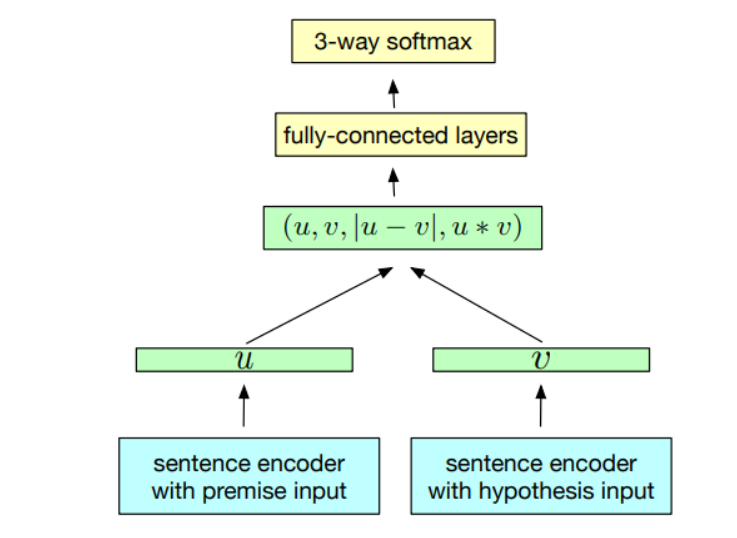

The output vectors of the above operations is fed into a classifier that tags them into on e of the above 3 defined categories. The paper used for this purpose proposes various encoder architectures, majorly focussed on GRU, LSTM and BiLSTM.

Important step to implement InferSent : For the purpose of implementing InferSent we shall be using PyTOrch. Hence, the research emphasizes use of latest version of PyTorch. This can be installed from [here](https://pytorch.org/get-started/locally/#mac-anaconda).

## Step 1:
### There are 2 versions of  InferSent.

Version 1 uses GLovE

Version 2 uses fastText

Hence for the purpose of this reasearch, downloading InferSent Model and the pre-trained Word Vectors. Hence, it is essential to download the model from the Facebook repository https://github.com/facebookresearch/InferSent and store it to our directory. 

Similarly, the trained model and pre-trained GLoVe also need to be saved. As per the code below the research work directory will have 2 folders - encoders and GLoVe. The encoder folder will hace model and GLoV folder will have the word vectors. 



In [ ]:
# Python 3.x
!pip3 install torch torchvision

In [ ]:
# Verifying if PyTorch is installed correctly
import torch
x = torch.rand(5, 3)
print(x)

PyTorch is working properly. 

In [ ]:
# The encoder folder will hace model and GLoV folder will have the word vectors
! mkdir encoder
! curl -Lo encoder/infersent2.pkl https://dl.fbaipublicfiles.com/infersent/infersent2.pkl
  
! mkdir GloVe
! curl -Lo GloVe/glove.840B.300d.zip http://nlp.stanford.edu/data/glove.840B.300d.zip
! unzip GloVe/glove.840B.300d.zip -d GloVe/

In [ ]:
# import stuff
%load_ext autoreload
%autoreload 2
%matplotlib inline

from random import randint
import numpy as np
import torch

Its required to download the models.py file from the link : https://github.com/facebookresearch/InferSent

In [ ]:
import sys
import os

In [ ]:
from google.colab import files
files.upload()

In [ ]:
# Load model

from models import InferSent
model_version = 1
MODEL_PATH = "encoder/infersent%s.pkl" % model_version
params_model = {'bsize': 64, 'word_emb_dim': 300, 'enc_lstm_dim': 2048,
                'pool_type': 'max', 'dpout_model': 0.0, 'version': model_version}
model = InferSent(params_model)
model.load_state_dict(torch.load(MODEL_PATH))

W2V_PATH = '/content/GloVe/glove.840B.300d.txt'
model_is.set_w2v_path(W2V_PATH)

In [ ]:
# Keep it on CPU or put it on GPU
use_cuda = False
model = model.cuda() if use_cuda else model

In [ ]:

# If infersent1 -> use GloVe embeddings. If infersent2 -> use InferSent embeddings.
W2V_PATH = 'GloVe/glove.840B.300d.txt' if model_version == 1 else 'fastText/crawl-300d-2M.vec'
model.set_w2v_path(W2V_PATH)

In [ ]:
# Load embeddings of K most frequent words
model.build_vocab_k_words(K=100000)

In [ ]:

# Load some sentences
sentences = []
with open('samples.txt') as f:
    for line in f:
        sentences.append(line.strip())
print(len(sentences))

In [ ]:
sentences[:5]

In [ ]:
# Encoding the job_descriptions
# gpu mode : >> 1000 sentences/s
# cpu mode : ~100 sentences/s

In [ ]:
embeddings = model.encode(sentences, bsize=128, tokenize=False, verbose=True)
print('nb sentences encoded : {0}'.format(len(embeddings)))

In [ ]:
np.linalg.norm(model.encode(['the cat eats.']))

In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
cosine(model.encode(['the cat eats.'])[0], model.encode(['the cat drinks.'])[0])

In [ ]:

idx = randint(0, len(sentences))
_, _ = model.visualize(sentences[idx])

In [ ]:
my_sent = 'The cat is drinking milk.'
_, _ = model.visualize(my_sent)

In [ ]:
model.build_vocab_k_words(500000) # getting 500K words vocab
my_sent = 'barack-obama is the former president of the United-States.'
_, _ = model.visualize(my_sent)

### Step 2:
Then, we build the vocabulary from the list of sentences that we defined at the beginning:

In [ ]:
model.build_vocab(sentences, tokenize=True)

### Step 3:
Like before, we have the test query and we use InferSent to encode this test query and generate an embedding for it.

In [ ]:
query = "I had pizza and pasta"
query_vec = model.encode(query)[0]
query_vec

### Step 4:
Finally, we compute the cosine similarity of this query with each sentence in our text:

In [ ]:
similarity = []
for sent in sentences:
  sim = cosine(query_vec, model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)



---



## 4. Universal Sentence Encoder

The Universal Sentence Encoder is currently one of the most effective sentence embedding methods. And it should come as no surprise to anyone that Google has recommended it. The most important characteristic is that it may be used for multi-task learning.

This implies that the sentence embeddings we generate may be utilised for a variety of tasks such as sentiment analysis, text categorization, sentence similarity, and so on, with the results being fed back into the model to produce even better sentence vectors.

The most intriguing aspect is that this encoder is built on two encoder types, both of which may be used:
- Transformer
- Deep Averaging Network(DAN)

Both of these models can take a single word or a single phrase and generate embeddings for it. The basic flow is as follows:
1. After changing the sentences to lowercase, tokenize them.
2. The phrase is transformed to a 512-dimensional vector depending on the type of encoder used.
  a. When we utilise the transformer, we are using the self-attention mechanism, which is comparable to the encoder module of the transformer design.
  b. The DAN option first computes the unigram and bigram embeddings before averaging them to get a single embedding. This is then fed into a deep neural network, which produces a 512-dimensional sentence embedding.
3. These sentence embeddings are then employed in a variety of unsupervised and supervised tasks such as Skipthoughts, NLI, and other similar tasks. After that, the trained model is utilised to create a new 512-dimension sentence embedding.

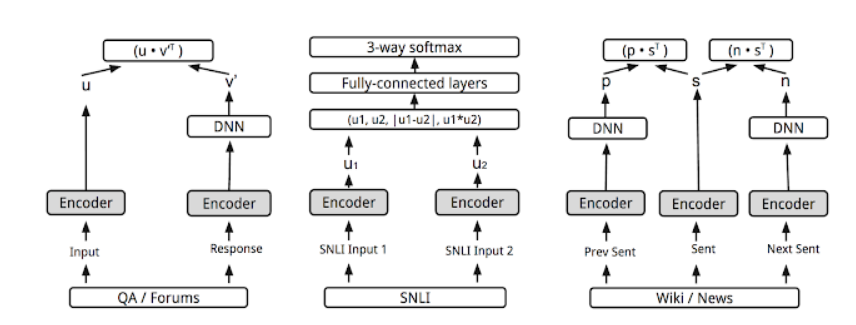



```
# This is formatted as code
```

To start using the USE embedding, we first need to install TensorFlow and TensorFlow hub:



In [ ]:
!pip3 install --upgrade tensorflow-gpu
# Install TF-Hub.
!pip3 install tensorflow-hub



```
# This is formatted as code
```

### Step 1: Firstly, we will import the following necessary libraries:

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

### Step 2: The model is available to us via the TFHub. Let’s load the 

1.   List item
2.   List item

model:



In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)
print ("module %s loaded" % module_url)

### Step 3: Then we will generate embeddings for our sentence list as well as for our query. This is as simple as just passing the sentences to the model:

In [ ]:
sentence_embeddings = model(sentences)
query = "I had pizza and pasta"
query_vec = model([query])[0]

[link text](https://)### Step 4: Finally, we will compute the similarity between our test query and the list of sentences:



In [ ]:
for sent in sentences:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

#Conclusion

Finally, we looked at the top four sentence embedding strategies used in NLP, as well as the fundamental algorithms for using them to detect text similarity. This reasearch strongly advises you to use a larger dataset and test these models on it for additional NLP jobs as well. This is also simply a simple algorithm for calculating sentence similarity. Preprocessing these phrases first and then transforming them into embeddings is required for a good model.

This reasearch also provided an outline of the architecture, and it forwards to learn more about how sentence embedding methods will improve to help robots comprehend human language even better.

Furthermore, this research does not imply that other popular models do not exist. FastSent, Skip-thought, Quick-thought, Word Movers Embedding, and others received honourable mentions. However, the similar appraoch can be exteded for the use of the above mentioned latest techniques. Due to the timelines, the research is limited to the famous 4 sentence embedding techniques. 

